In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

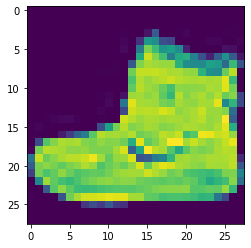

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train.max()

255

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), 
                 input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test),
         epochs=20, callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 271us/sample - loss: 0.4067 - accuracy: 0.8555 - val_loss: 0.3261 - val_accuracy: 0.8828
Epoch 2/20
60000/60000 [==============================] - 16s 266us/sample - loss: 0.2793 - accuracy: 0.8984 - val_loss: 0.3067 - val_accuracy: 0.8859
Epoch 3/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.2342 - accuracy: 0.9129 - val_loss: 0.2720 - val_accuracy: 0.9017
Epoch 4/20
60000/60000 [==============================] - 17s 283us/sample - loss: 0.2001 - accuracy: 0.9255 - val_loss: 0.2685 - val_accuracy: 0.9000
Epoch 5/20
60000/60000 [==============================] - 19s 317us/sample - loss: 0.1725 - accuracy: 0.9357 - val_loss: 0.2606 - val_accuracy: 0.9089
Epoch 6/20
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1490 - accuracy: 0.9444 - val_loss: 0.2742 - val_accuracy: 0.9074
Epoch 7/20
60000/60000 [====================

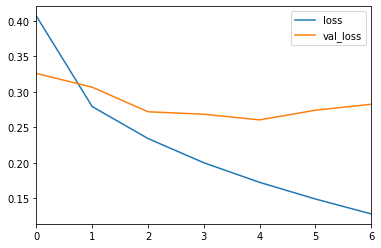

In [17]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

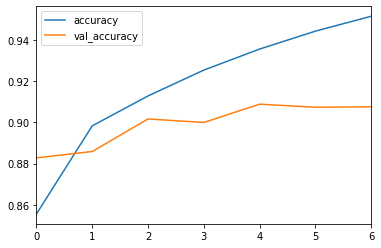

In [18]:
metrics[['accuracy', 'val_accuracy']].plot()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.81      0.84      1000
           3       0.94      0.89      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.70      0.79      0.74      1000
           7       0.98      0.93      0.95      1000
           8       0.98      0.99      0.99      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [20]:
confusion_matrix(y_test, predictions)

array([[865,   0,  18,   8,   4,   0,  99,   0,   6,   0],
       [  1, 979,   1,  10,   4,   0,   4,   0,   1,   0],
       [ 17,   0, 807,   5,  67,   0, 102,   0,   1,   1],
       [ 19,   3,   9, 890,  36,   0,  41,   0,   2,   0],
       [  1,   1,  35,  18, 860,   0,  85,   0,   0,   0],
       [  0,   0,   0,   0,   0, 985,   0,   6,   0,   9],
       [ 95,   1,  41,  17,  48,   0, 791,   0,   7,   0],
       [  0,   0,   0,   0,   0,  15,   0, 930,   0,  55],
       [  4,   0,   1,   1,   1,   2,   3,   1, 987,   0],
       [  0,   0,   0,   0,   0,   3,   1,  14,   0, 982]])

In [21]:
import seaborn as sns

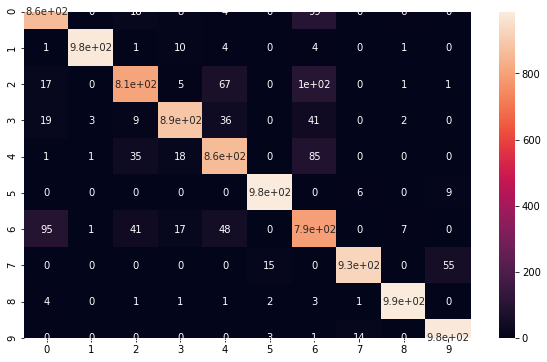

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

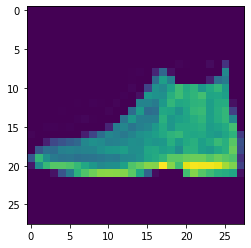

In [24]:
plt.imshow(x_test[0].reshape(28, 28))

In [25]:
my_image = x_test[0]
model.predict_classes(my_image.reshape(1, 28, 28, 1))

array([9])

In [26]:
y_test[0]

9